#**CE-40550: Machine Learning for Bioinformatics HW3(Practical(65+10))**

Full name: Mahdi Kafi

Student number: 99210753

#0.Preparation

Load your dataset using pandas then:

1.   Separate target feaure
2.   Encode categorical features
3.   Do train-test split


In [1]:
import pandas as pd
# from sklearn.preprocessing import 
covid_data = pd.read_csv('Covid Dataset.csv')
#TODO
covid_data = covid_data.replace(["Yes", "No"], [1, 0])
# Extract X and Y from the dataset
X_total = covid_data.iloc[:, 0:20].values
y_total = covid_data.iloc[:,20].values


#SPLIT THE DATA INTO TRAIN AND TEST DATA 
#70-30 train-test splitting is enough 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_total, y_total, test_size = 0.3, random_state = 0)

#1.Dimensionality Reduction
Reduce the dimension of the data by various methods

**Note: reduced dimension resulted from all bellow  methods must be 2**

##1.PCA

In this part you must implement PCA yourself.

In [3]:
import numpy as np
def calculate_covariance_matrix(X, Y=None):
    """ Calculate the covariance matrix for the dataset X """
    if Y is None:
        Y = X
    ##TODO##
    n_samples = np.shape(X)[0]
    X = X - X.mean()
    covariance_matrix = (1 / (n_samples-1)) * (X.T @ X)

    return covariance_matrix

class PCA_():
    """A method for doing dimensionality reduction by transforming the feature
    space to a lower dimensionality, removing correlation between features and
    maximizing the variance along each feature axis. This class is also used throughout
    the project to plot data.
    """
    def transform(self, X, n_components):
        """ Fit the dataset to the number of principal components specified in the
        constructor and return the transformed dataset """
        covariance_matrix = calculate_covariance_matrix(X)

        # Where (eigenvector[:,0] corresponds to eigenvalue[0])
        eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)

        # Sort the eigenvalues and corresponding eigenvectors from largest
        # to smallest eigenvalue and select the first n_components
        idx = eigenvalues.argsort()[::-1]
        eigenvalues = eigenvalues[idx]
        eigenvectors = eigenvectors[:, idx][:, :n_components]

        # Project the data onto principal components
        X_transformed = X @ eigenvectors

        return X_transformed
      ##TODO##

Apply PCA(scikit) and your PCA on covid dataset using two components in bellow cell for later usage

In [4]:
##TODO###
from sklearn.decomposition import PCA
n_components = 2
pc_train = PCA_().transform(X_train, n_components)
pc_test = PCA_().transform(X_test, n_components)

sk_pca = PCA(n_components)
sk_pca_train = sk_pca.fit_transform(X_train)
sk_pca_test = sk_pca.fit_transform(X_test)

##2.t-SNE

**t-distributed Stochastic Neighbor Embedding**

t-SNE is a tool to visualize high-dimensional data. It converts similarities between data points to joint probabilities and tries to minimize the Kullback-Leibler divergence between the joint probabilities of the low-dimensional embedding and the high-dimensional data. t-SNE has a cost function that is not convex, i.e. with different initializations we can get different results.

Apply t-SNE on Covid dataset using Scikit.

In [5]:
##Apply t-SNE
from sklearn.manifold import TSNE
tsne_train = TSNE(n_components).fit_transform(X_train)
tsne_test = TSNE(n_components).fit_transform(X_test)

##3.SVD

This transformer performs linear dimensionality reduction by means of truncated singular value decomposition (SVD). Contrary to PCA, this estimator does not center the data before computing the singular value decomposition. This means it can work with sparse matrices efficiently.

Apply Singular Value Decomposition(SVD) on covid dataset using Scikit(TruncatedSVD).

In [6]:
##Apply SVD
from sklearn.decomposition import TruncatedSVD
svd_train = TruncatedSVD(n_components).fit_transform(X_train)
svd_test = TruncatedSVD(n_components).fit_transform(X_test)

##4.LDA

Linear Discriminant Analysis, or LDA, is a multi-class classification algorithm that can be used for dimensionality reduction.

Apply Linear Discriminant Analysis on Covid dataset using Scikit.

In [7]:
##Apply LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda_train = LinearDiscriminantAnalysis(n_components=1).fit_transform(X_train, y_train)
lda_test = LinearDiscriminantAnalysis(n_components=1).fit_transform(X_test, y_test)

##5.Isomap Embedding

Isomap Embedding, or Isomap, creates an embedding of the dataset and attempts to preserve the relationships in the dataset.

Apply Isomap on Covid dataset using Scikit.

In [8]:
##Apply Isomap
from sklearn.manifold import Isomap
isomap_train = Isomap().fit_transform(X_train)
isomap_test = Isomap().fit_transform(X_test)

##6.Locally Linear Embedding

Locally Linear Embedding, or LLE, creates an embedding of the dataset and attempts to preserve the relationships between neighborhoods in the dataset.

Apply LLE on covid dataset using Scikit.

In [9]:
##Apply LLE
from sklearn.manifold import LocallyLinearEmbedding
lle_train = LocallyLinearEmbedding(eigen_solver='dense').fit_transform(X_train)
lle_test = LocallyLinearEmbedding(eigen_solver='dense').fit_transform(X_test)

##7.Modified Locally Linear Embedding

Modified Locally Linear Embedding, or Modified LLE, is an extension of Locally Linear Embedding that creates multiple weighting vectors for each neighborhood.

Apply MLLE on Covid dataset using Scikit.

In [10]:
##Apply MLLE
mlle_train = LocallyLinearEmbedding(eigen_solver='dense', method='modified').fit_transform(X_train)
mlle_test = LocallyLinearEmbedding(eigen_solver='dense', method='modified').fit_transform(X_test)

/home/mahdi/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_locally_linear.py:418: RuntimeWarning: divide by zero encountered in true_divide
  tmp[:, :nev] /= evals + reg[:, None]
/home/mahdi/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_locally_linear.py:428: RuntimeWarning: invalid value encountered in true_divide
  rho = evals[:, n_components:].sum(1) / evals[:, :n_components].sum(1)
/home/mahdi/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_locally_linear.py:436: RuntimeWarning: invalid value encountered in true_divide
  eta_range = evals_cumsum[:, -1:] / evals_cumsum[:, :-1] - 1
/home/mahdi/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_locally_linear.py:449: RuntimeWarning: invalid value encountered in double_scalars
  alpha_i = np.linalg.norm(Vi.sum(0)) / np.sqrt(s_i)
/home/mahdi/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_locally_linear.py:418: RuntimeWarning: divide by zero encountered in true_divide
  tmp[:, :nev] /= evals + reg

##8.Kernel Principal component analysis (KPCA)

In [11]:
##Apply KPCA on Covid dataset using different kernels(rbf,linear,poly)
from sklearn.decomposition import KernelPCA
rbf_pca_train = KernelPCA(n_components=n_components, kernel='rbf').fit_transform(X_train)
rbf_pca_test = KernelPCA(n_components=n_components, kernel='rbf').fit_transform(X_test)

lin_pca_train = KernelPCA(n_components=n_components, kernel='linear').fit_transform(X_train)
lin_pca_test = KernelPCA(n_components=n_components, kernel='linear').fit_transform(X_test)

pol_pca_train = KernelPCA(n_components=n_components, kernel='poly').fit_transform(X_train)
pol_pca_test = KernelPCA(n_components=n_components, kernel='poly').fit_transform(X_test)

##9.Univariate statistical tests

Select features according to the k highest scores.

Use SelectKBest from Scikit.

In [12]:
##Apply SelectKBest
from sklearn.feature_selection import chi2, SelectKBest
kbest_train = SelectKBest(chi2, k=2).fit_transform(X_train, y_train)
kbest_test = SelectKBest(chi2, k=2).fit_transform(X_test, y_test)

##10.DNN as nonlinear dimensionality reduction method((+10 points))

Autoencoder is an unsupervised artificial neural network that compresses the data to lower dimension and then reconstructs the input back. Autoencoder finds the representation of the data in a lower dimension by focusing more on the important features getting rid of noise and redundancy. It's based on Encoder-Decoder architecture, where encoder encodes the high-dimensional data to lower-dimension and decoder takes the lower-dimensional data and tries to reconstruct the original high-dimensional data.

![picture](https://drive.google.com/uc?id=1hClS6gCbW1P3Wk84KABT5k2mYiOrludQ)
![picture](https://drive.google.com/uc?id=1RTZwx4xL6zFV_nUENBgWlFKLKldPoyI-)

In the above Diagram, X is the input data, z is the lower-dimension representation of input X and X’ is the reconstructed input data. The mapping of higher to lower dimensions can be linear or non-linear depending on the choice of the activation function.

In this part you're gonna implement an autoencoder using Keras framework as dimensionally reduction module as explained [here](https://blog.keras.io/building-autoencoders-in-keras.html)

In [13]:
#TODO
from keras.layers import Input, Dense
from keras.models import Model

input_data = Input(shape=(20, ))
encoded = Dense(units=15, activation='relu')(input_data)
encoded = Dense(units=10, activation='relu')(encoded)
encoded = Dense(units=5, activation='relu')(encoded)
encoded = Dense(units=2, activation='relu')(encoded)
decoded = Dense(units=5, activation='relu')(encoded)
decoded = Dense(units=10, activation='relu')(decoded)
decoded = Dense(units=15, activation='relu')(decoded)
decoded = Dense(units=20, activation='sigmoid')(decoded)
autoencoder = Model(input_data, decoded)
encoder = Model(input_data, encoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
autoencoder.fit(X_train, X_train, epochs=50, batch_size=512, validation_data=(X_test, X_test))
# autoencoder.evaluate(X_train, X_train)

Epoch 1/50
8/8 [==============================] - 1s 54ms/step - loss: 0.6875 - accuracy: 0.0323 - val_loss: 0.6825 - val_accuracy: 0.0362
Epoch 2/50
8/8 [==============================] - 0s 12ms/step - loss: 0.6817 - accuracy: 0.0349 - val_loss: 0.6750 - val_accuracy: 0.0362
Epoch 3/50
8/8 [==============================] - 0s 10ms/step - loss: 0.6740 - accuracy: 0.0336 - val_loss: 0.6658 - val_accuracy: 0.0386
Epoch 4/50
8/8 [==============================] - 0s 14ms/step - loss: 0.6642 - accuracy: 0.0443 - val_loss: 0.6548 - val_accuracy: 0.0405
Epoch 5/50
8/8 [==============================] - 0s 12ms/step - loss: 0.6539 - accuracy: 0.0419 - val_loss: 0.6424 - val_accuracy: 0.0435
Epoch 6/50
8/8 [==============================] - 0s 11ms/step - loss: 0.6406 - accuracy: 0.0456 - val_loss: 0.6296 - val_accuracy: 0.0460
Epoch 7/50
8/8 [==============================] - 0s 13ms/step - loss: 0.6277 - accuracy: 0.0423 - val_loss: 0.6180 - val_accuracy: 0.0405
Epoch 8/50
8/8 [===========

# 2.Clustering

After clustering the data using either of bellow methods, evaluate your model by ground truth labels of test data.

Then plot the clusters to see how much clusters could be discriminated.summary

## 1.Introducing k-Means

The *k*-means algorithm searches for a pre-determined number of clusters within an unlabeled multidimensional dataset.
It accomplishes this using a simple conception of what the optimal clustering looks like:

- The "cluster center" is the arithmetic mean of all the points belonging to the cluster.
- Each point is closer to its own cluster center than to other cluster centers.

Those two assumptions are the basis of the *k*-means model.


### 1.Implementing k-Means from scratch

In [132]:
import numpy as np
from scipy.spatial.distance import cdist 
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

#Defining our function 
def kmeans(x,k, no_of_iterations):
    idx = np.random.randint(0, x.shape[0], k)
    #Randomly choosing Centroids 
    centroids = x[idx]
     
    #finding the distance between centroids and all the data points
    distances = cdist(x, centroids ,'euclidean') #Step 2
     
    #Centroid with the minimum Distance
    points =  distances.argmin(axis=1)
     
    #Repeating the above steps for a defined number of iterations
    #Step 4
    for _ in range(no_of_iterations): 
        centroids = []
        for idx in range(k):
            #Updating Centroids by taking mean of Cluster it belongs to
            temp_cent = x[points==idx].mean(axis=0)
            centroids.append(temp_cent)
        #Updated Centroids 
        centroids = np.array(centroids)
         
        distances = cdist(x, centroids ,'euclidean')
        points = distances.argmin(axis=1)
    return points, centroids

def predict_kmeans(X, centroids):
    distances = cdist(X, centroids, 'euclidean')
    points = distances.argmin(axis=1)
    return points

def accuracy(y_pred, y_test):
    true = (y_pred == y_test).sum()
    return true/len(y_pred)

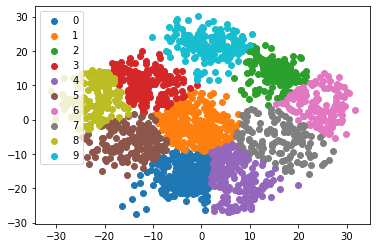

In [146]:
###Don't change this cell
#Load Data
data = load_digits().data
pca = PCA(2)
#Transform the data
df = pca.fit_transform(data)
 
#Applying your function
label = kmeans(df,10,1000)[0]
 
#Visualize the results
 
u_labels = np.unique(label)
for i in u_labels:
    plt.scatter(df[label == i , 0] , df[label == i , 1] , label = i)
plt.legend()
plt.show()

[0 1]


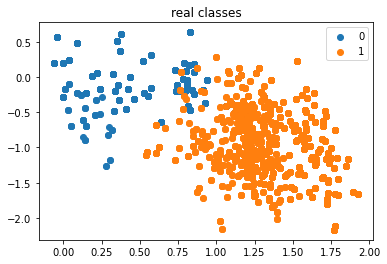

[0 1]


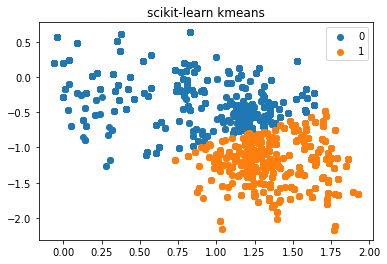

[0 1]


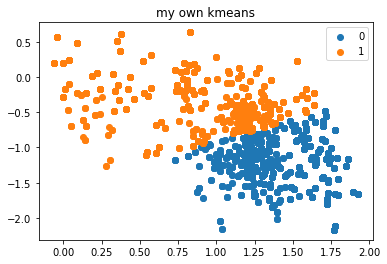

[0 1]


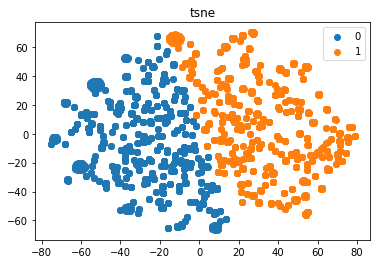

[0 1]


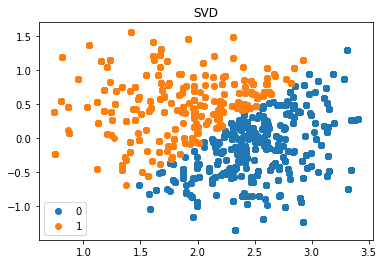

[0 1]


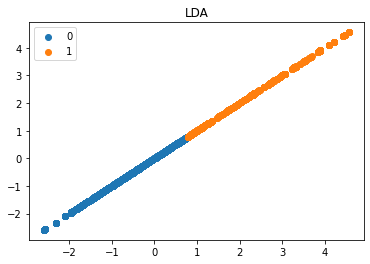

[0 1]


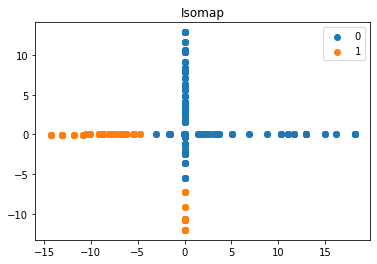

[0 1]


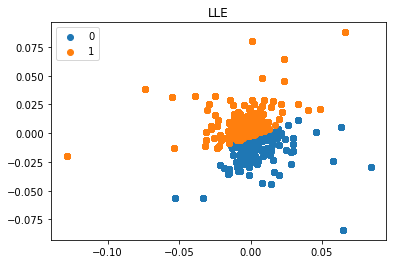

[0 1]


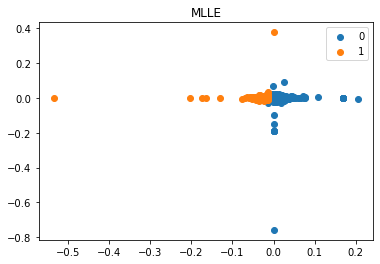

[0 1]


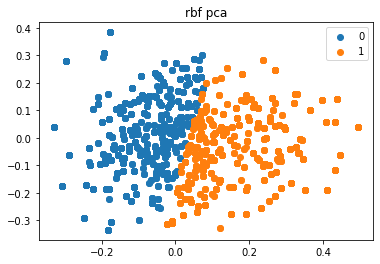

[0 1]


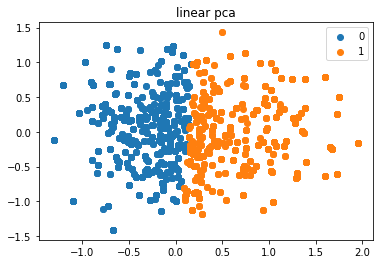

[0 1]


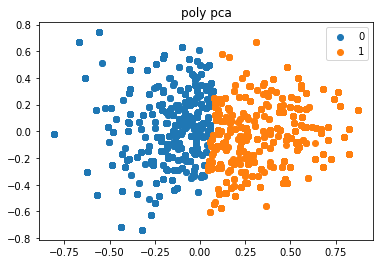

In [188]:
###Apply kmeans from scikit to dimensionally reduced covid dataset and compare that to your implemetation and then visualize the clusters from all methods of dimensionality reduced data of above methods.
### after clustering the data, evaluate your model by ground truth labels of test data.
#Plotting the real classes
label = y_train
u_labels = np.unique(label)
print(u_labels)
for i in u_labels:
    plt.scatter(pc_train[label == i , 0] , pc_train[label == i , 1] , label = i)
plt.title(f"real classes")
plt.legend()
plt.show()
# Scikit-learn KMeans
sk_kmeans = KMeans(n_clusters=2, random_state=32).fit(pc_train)
u_labels = np.unique(sk_kmeans.labels_)
print(u_labels)
for i in u_labels:
    plt.scatter(pc_train[sk_kmeans.labels_ == i , 0] , pc_train[sk_kmeans.labels_ == i , 1] , label = i)
plt.title(f"scikit-learn kmeans")
plt.legend()
plt.show()
# My own kmeans
label = kmeans(pc_train, 2, 300)[0]
u_labels = np.unique(label)
print(u_labels)
for i in u_labels:
    plt.scatter(pc_train[label == i , 0] , pc_train[label == i , 1] , label = i)
plt.title(f"my own kmeans")
plt.legend()
plt.show()
#tsne
df = tsne_train
label = kmeans(df, 2, 300)[0]
u_labels = np.unique(label)
print(u_labels)
for i in u_labels:
    plt.scatter(df[label == i , 0] , df[label == i , 1] , label = i)
plt.title(f"tsne")
plt.legend()
plt.show()
#SVD
df = svd_train
label = kmeans(df, 2, 300)[0]
u_labels = np.unique(label)
print(u_labels)
for i in u_labels:
    plt.scatter(df[label == i , 0] , df[label == i , 1] , label = i)
plt.title(f"SVD")
plt.legend()
plt.show()
#LDA
df = lda_train
label = kmeans(df, 2, 300)[0]
u_labels = np.unique(label)
print(u_labels)
for i in u_labels:
    plt.scatter(df[label == i] , df[label == i] , label = i)
plt.title(f"LDA")
plt.legend()
plt.show()
#Isomap
df = isomap_train
label = kmeans(df, 2, 300)[0]
u_labels = np.unique(label)
print(u_labels)
for i in u_labels:
    plt.scatter(df[label == i , 0] , df[label == i , 1] , label = i)
plt.title(f"Isomap")
plt.legend()
plt.show()
#LLE
df = lle_train
label = kmeans(df, 2, 300)[0]
u_labels = np.unique(label)
print(u_labels)
for i in u_labels:
    plt.scatter(df[label == i , 0] , df[label == i , 1] , label = i)
plt.title(f"LLE")
plt.legend()
plt.show()
#MLLE
df = mlle_train
label = kmeans(df, 2, 300)[0]
u_labels = np.unique(label)
print(u_labels)
for i in u_labels:
    plt.scatter(df[label == i , 0] , df[label == i , 1] , label = i)
plt.title(f"MLLE")
plt.legend()
plt.show()
#RBF
df = rbf_pca_train
label = kmeans(df, 2, 300)[0]
u_labels = np.unique(label)
print(u_labels)
for i in u_labels:
    plt.scatter(df[label == i , 0] , df[label == i , 1] , label = i)
plt.title(f"rbf pca")
plt.legend()
plt.show()
#lin
df = lin_pca_train
label = kmeans(df, 2, 300)[0]
u_labels = np.unique(label)
print(u_labels)
for i in u_labels:
    plt.scatter(df[label == i , 0] , df[label == i , 1] , label = i)
plt.title(f"linear pca")
plt.legend()
plt.show()
#pol
df = pol_pca_train
label = kmeans(df, 2, 300)[0]
u_labels = np.unique(label)
print(u_labels)
for i in u_labels:
    plt.scatter(df[label == i , 0] , df[label == i , 1] , label = i)
plt.title(f"poly pca")
plt.legend()
plt.show()

In [183]:
#Evaluating the model using test data as ground truth
centroids = kmeans(pc_train, 2, 300)[1]
y_pred = predict_kmeans(pc_test, centroids)
accuracy(y_pred, y_test)

0.8050275904353158

### 2.k-Means Algorithm: Expectation–Maximization

Expectation–maximization (E–M) is a powerful algorithm that comes up in a variety of contexts within data science.
*k*-means is a particularly simple and easy-to-understand application of the algorithm, and we will walk through it briefly here.
In short, the expectation–maximization approach here consists of the following procedure:

1. Guess some cluster centers
2. Repeat until converged
   1. *E-Step*: assign points to the nearest cluster center
   2. *M-Step*: set the cluster centers to the mean 

Here the "E-step" or "Expectation step" is so-named because it involves updating our expectation of which cluster each point belongs to.
The "M-step" or "Maximization step" is so-named because it involves maximizing some fitness function that defines the location of the cluster centers—in this case, that maximization is accomplished by taking a simple mean of the data in each cluster.

The literature about this algorithm is vast, but can be summarized as follows: under typical circumstances, each repetition of the E-step and M-step will always result in a better estimate of the cluster characteristics.

We can visualize the algorithm as shown in the following figure.
For the particular initialization shown here, the clusters converge in just three iterations.
Let's see it.

![picture](https://drive.google.com/uc?id=1oJrV3qmGrxV_SUk5YMKBDwRR6U0RCkzn)

<ipython-input-88-0afa883ef77f>:71: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show('expectation-maximization.png')


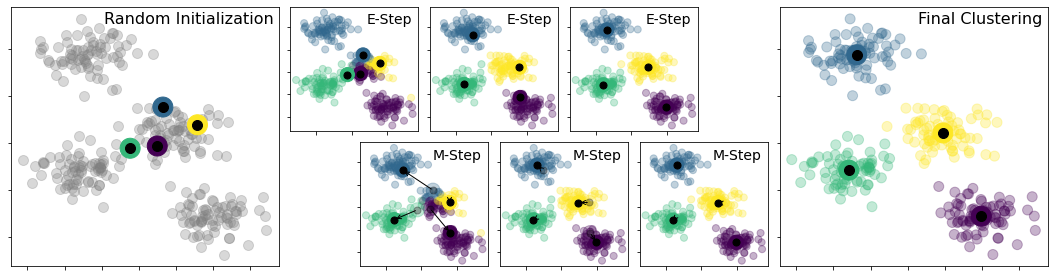

In [88]:
from sklearn.datasets.samples_generator import make_blobs
from sklearn.metrics import pairwise_distances_argmin
import numpy as np
import matplotlib.pyplot as plt
X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)

rng = np.random.RandomState(42)
centers = [0, 4] + rng.randn(4, 2)

def draw_points(ax, c, factor=1):
    ax.scatter(X[:, 0], X[:, 1], c=c, cmap='viridis',
               s=50 * factor, alpha=0.3)
    
def draw_centers(ax, centers, factor=1, alpha=1.0):
    ax.scatter(centers[:, 0], centers[:, 1],
               c=np.arange(4), cmap='viridis', s=200 * factor,
               alpha=alpha)
    ax.scatter(centers[:, 0], centers[:, 1],
               c='black', s=50 * factor, alpha=alpha)

def make_ax(fig, gs):
    ax = fig.add_subplot(gs)
    ax.xaxis.set_major_formatter(plt.NullFormatter())
    ax.yaxis.set_major_formatter(plt.NullFormatter())
    return ax

fig = plt.figure(figsize=(15, 4))
gs = plt.GridSpec(4, 15, left=0.02, right=0.98, bottom=0.05, top=0.95, wspace=0.2, hspace=0.2)
ax0 = make_ax(fig, gs[:4, :4])
ax0.text(0.98, 0.98, "Random Initialization", transform=ax0.transAxes,
         ha='right', va='top', size=16)
draw_points(ax0, 'gray', factor=2)
draw_centers(ax0, centers, factor=2)
###TODO###
for i in range(3):
    ax1 = make_ax(fig, gs[:2, 4 + 2 * i:6 + 2 * i])
    ax2 = make_ax(fig, gs[2:, 5 + 2 * i:7 + 2 * i])
    
    # E-step
    y_pred = pairwise_distances_argmin(X, centers)
    draw_points(ax1, y_pred)
    draw_centers(ax1, centers)
    
    # M-step
    new_centers = np.array([X[y_pred == i].mean(axis=0) for i in range(4)])
    draw_points(ax2, y_pred)
    draw_centers(ax2, centers, alpha=0.3)
    draw_centers(ax2, new_centers)
    for i in range(4):
        ax2.annotate('', new_centers[i], centers[i],
                     arrowprops=dict(arrowstyle='->', linewidth=1))
        
   
    # Finish iteration
    centers = new_centers
    ax1.text(0.95, 0.95, "E-Step", transform=ax1.transAxes, ha='right', va='top', size=14)
    ax2.text(0.95, 0.95, "M-Step", transform=ax2.transAxes, ha='right', va='top', size=14)


# Final E-step    
y_pred = pairwise_distances_argmin(X, centers)
###TODO### 
axf = make_ax(fig, gs[:4, -4:])
draw_points(axf, y_pred, factor=2)
draw_centers(axf, centers, factor=2)
axf.text(0.98, 0.98, "Final Clustering", transform=axf.transAxes,
         ha='right', va='top', size=16)


fig.show('expectation-maximization.png')

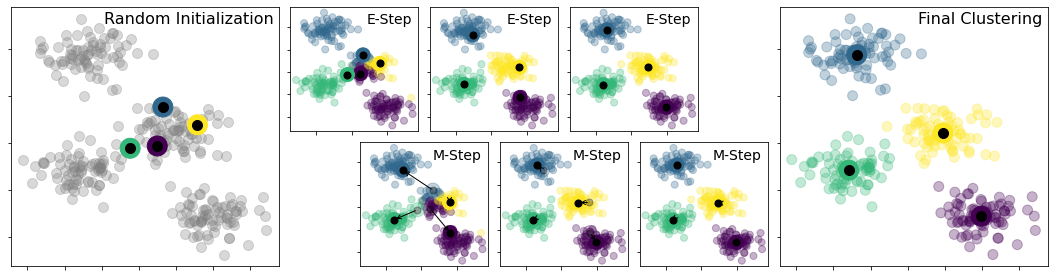

## 2.DBSCAN

The DBSCAN algorithm views clusters as areas of high density separated by areas of low density. Due to this rather generic view, clusters found by DBSCAN can be any shape, as opposed to k-means which assumes that clusters are convex shaped. The central component to the DBSCAN is the concept of core samples, which are samples that are in areas of high density. A cluster is therefore a set of core samples, each close to each other (measured by some distance measure) and a set of non-core samples that are close to a core sample (but are not themselves core samples). There are two parameters to the algorithm, **min_samples** and **eps**, which define formally what we mean when we say dense. Higher **min_samples** or lower **eps** indicate higher density necessary to form a cluster.

[0 1]


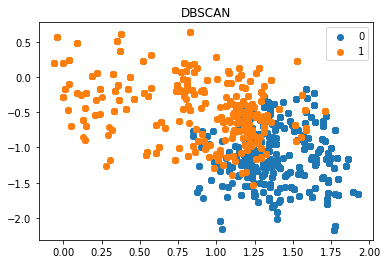

In [101]:
##Apply DBSCAN on dimensionally reduced data
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.35, min_samples=2).fit(pc_train)
u_labels = np.unique(dbscan.labels_)
print(u_labels)
for i in u_labels:
    plt.scatter(pc_train[label == i , 0] , pc_train[label == i , 1] , label = i)
plt.title(f"DBSCAN")
plt.legend()
plt.show()

## 3.Spectral clustering

SpectralClustering performs a low-dimension embedding of the affinity matrix between samples, followed by clustering, e.g., by KMeans, of the components of the eigenvectors in the low dimensional space.

[0 1]


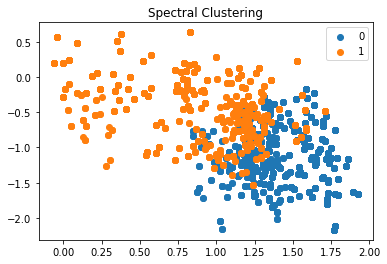

In [102]:
##Apply Specteral clustering using SpectralClustering from scikit
from sklearn.cluster import SpectralClustering
spec_clustering = SpectralClustering(n_clusters=2, assign_labels='discretize', random_state=0).fit(pc_train)
u_labels = np.unique(spec_clustering.labels_)
print(u_labels)
for i in u_labels:
    plt.scatter(pc_train[label == i , 0] , pc_train[label == i , 1] , label = i)
plt.title(f"Spectral Clustering")
plt.legend()
plt.show()

## 4.Agglomerative clustering

A hierarchical clustering using a bottom up approach: each observation starts in its own cluster, and clusters are successively merged together. The linkage criteria determines the metric used for the merge strategy:

[0 1]


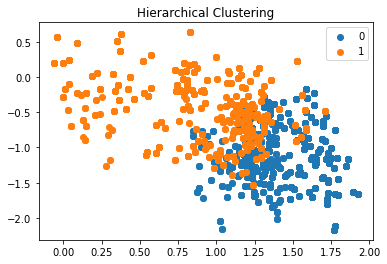

In [103]:
##Apply hierarchical clustering using AgglomerativeClustering from scikit
from sklearn.cluster import AgglomerativeClustering
hierarchical_clustering = AgglomerativeClustering().fit(pc_train)
u_labels = np.unique(hierarchical_clustering.labels_)
print(u_labels)
for i in u_labels:
    plt.scatter(pc_train[label == i , 0] , pc_train[label == i , 1] , label = i)
plt.title(f"Hierarchical Clustering")
plt.legend()
plt.show()

## 5.Clustering of a high-dimensional data
We are going to do cluster analysis on a high-dimensional dateset.

The dataset is a gene expression profile of 35 samples,23 from peripheral blood/bone marrow mononuclear cells of T-PLL patients and 12 sample from different T cell types of 2 healthy donors.
T-PLL is a relatively lethal leukemia rising from anomalies in body T-cell production.T-cell is a white blood cell helping protection from infections.

For each sample there are more than 50000 expression measurements in the dataset.Each feature is a probe set that has correspondence with one or more sequences in a gene family.This information could be found by decoding the probe set id.
[More info](http://www.affymetrix.com/support/help/faqs/mouse_430/faq_8.affx)

The dataset is located at NCBI Gene Expression Omnibus.In order to retrieve and work with this database's datasets we use a python library named GEOparse.

In this section you can use any library you want.


In [189]:
!pip install GEOparse

     |████████████████████████████████| 278 kB 266 kB/s eta 0:00:01
  Created wheel for GEOparse: filename=GEOparse-2.0.3-py3-none-any.whl size=29033 sha256=c1863613d8c953f63f294d27811f53ed1e2362032a8db0cc9fdaf5c55625ebca
  Stored in directory: /home/mahdi/.cache/pip/wheels/7a/75/14/727a857e321c5e5590d7e58efe9f028d753d340cea4ee540f0
Successfully built GEOparse


In [ ]:
import GEOparse as G
gse = G.get_GEO(geo="GSE147930", destdir="./")
#DATASET:  https://ncbi.xyz/geo/query/acc.cgi?acc=GSE147930  

In [ ]:
#TODO: prepare expression profile(e.g. as an Pandas.DataFrame),a table with probe sets in rows/cols and samples in cols/rows.However you want.
#Try to make it so as to be able to filter out the patient samples further in the section.
#Apply log to expression values.Its common.It makes them more meaningfully comparable.

We're going to do *Class Discovery*,a common procedure in determining subtypes of the case under study.For T-PLL that appeares in different variants it helps to optimize or even customize(per patient) prognosis and treatment for the patients.

To deal with high dimensionality, select 2,10,50,1000 best features in terms of **Coefficient of Variation** from the **patients** samples:

In [ ]:
#TODO

In [ ]:
#TODO:For each of the 4 subdatasets made above run K-means algorithm for different number of cluseters(2 to 20)
#and plot the Sum of Square Error(for a sample the error is its distance^2 to its cluster center) against the number of clusters.


In [ ]:
#TODO:For every subdataset plot the K-means clustering result by applying tSNE to it.Use a good k determined
#from above or plot clusters for different k's to get a better insight if you will.Select a subdataset that you
#think is better and do the rest with that.
#Note that for data with high dimension/N tSNE needs a lower perplexity(num of nearest neighbors) to work well.

We want to identify differentially expressed genes in each cluster.To recognize them as cluster-specific genes.

In [ ]:
#For the subdataset and k that you chose , for every cluster find enriched features by subtracting
#the median expression of a feature in all other clusters from the mean expression of that feature in the cluster and selecting
#top p features.Choose p on your own.
#print the selected probe sets and plot the subdataset clustermap with features and samples hierarchically clustered
#in it.For every cluster mark its samples and its selected features in the plot.
#About clustermap you can see :https://seaborn.pydata.org/generated/seaborn.clustermap.html

In [ ]:
#Finally using whole samples(including healthy ones), firstly select 20 best features
#based on ANOVA F-value(between feature and label(=healthy or patient)) and then plot the subdataset
#clustermap with features and samples hierarchically clustered in it.

Here is an example clustermap:

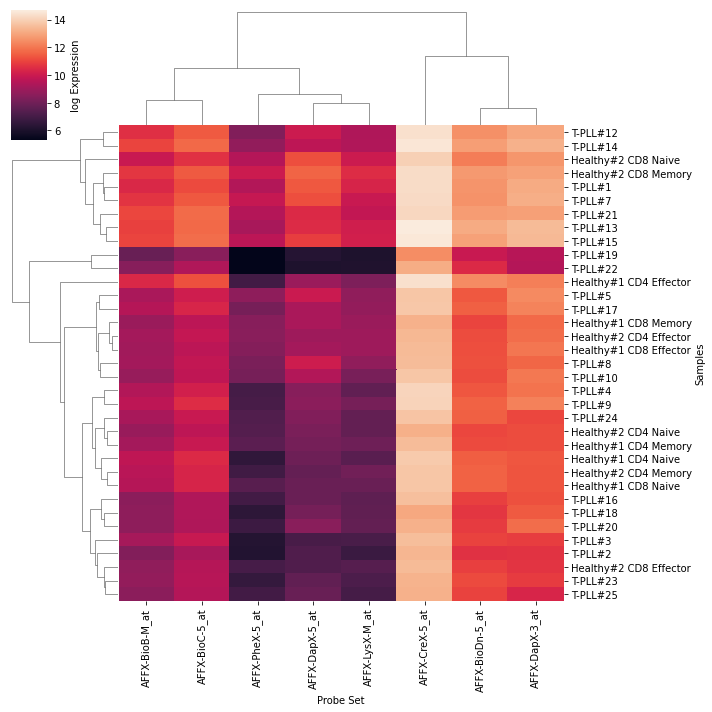

In this section the paper Zheng, G., Terry, J., Belgrader, P. et al. Massively parallel digital transcriptional profiling of single cells. Nat Commun 8, 14049 (2017). https://doi.org/10.1038/ncomms14049 is used as a reference